In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [5]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir_temperature = 'ocean_monthly_z/ts/monthly/5yr/'
filename_temperature = 'ocean_monthly_z.071101-071512.thetao.nc'

datadir_sinking = 'ocean_cobalt_omip_tracers_month_z/ts/monthly/5yr/'
filename_sinking = 'ocean_cobalt_omip_tracers_month_z.071101-071512.expc.nc'


temperature = xr.open_dataset(rootdir+datadir_temperature+filename_temperature)
sinking = xr.open_dataset(rootdir+datadir_sinking+filename_sinking)

In [3]:
print(temperature.thetao)

<xarray.DataArray 'thetao' (time: 60, z_l: 35, yh: 576, xh: 720)>
[870912000 values with dtype=float32]
Coordinates:
  * time     (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature


In [6]:
print(sinking.expc)

<xarray.DataArray 'expc' (time: 60, z_l: 35, yh: 576, xh: 720)>
[870912000 values with dtype=float32]
Coordinates:
  * time     (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Sinking Particulate Organic Carbon Flux
    units:          mol m-2 s-1
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sinking_mole_flux_of_particulate_organic_matter_expressed...


In [7]:
ds = xr.merge([temperature, sinking])


ds = ds.set_coords('thetao')

 
theta_bins = np.arange(-2,30,1) 
sinking_in_theta = ds.expc.isel(time=5).groupby_bins('thetao',theta_bins)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


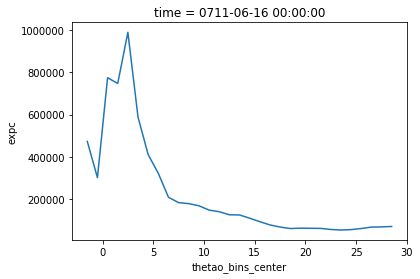

In [8]:
sinking_in_theta.count(xr.ALL_DIMS).plot()

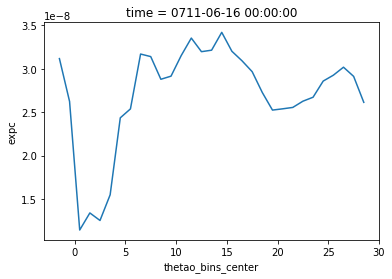

In [9]:
sinking_in_theta.mean(xr.ALL_DIMS).plot()